In [5]:
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
with open('groza.txt', encoding = 'utf-8') as f:
    text = f.read()
    words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
morph = MorphAnalyzer()

In [9]:
with open('groza.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
morph = MorphAnalyzer()
lemmas = []
for i in range(len(words)):
    w = morph.parse(words[i]) 
    wordform = w[0]   
    lemmas.append({'wordform': wordform.word,
                      'normal_form': wordform.normal_form,
                      'pos': wordform.tag.POS,
                      'animacy': wordform.tag.animacy,
                      'aspect': wordform.tag.aspect,
                      'case': wordform.tag.case,
                      'gender': wordform.tag.gender,
                      'involvement': wordform.tag.involvement,
                      'mood': wordform.tag.mood,
                      'number': wordform.tag.number,
                      'person': wordform.tag.person,
                      'tense': wordform.tag.tense,
                      'transitivity': wordform.tag.transitivity,
                      'voice ': wordform.tag.voice
                     }) 


In [13]:
import pandas as pd
dataframe = dataframe[['wordform', 'normal_form', 'pos', 'animacy', 'aspect', \
                       'case', 'gender', 'involvement', 'mood', 'number', 'person', \
                       'tense', 'transitivity', 'voice ']]
dataframe

,wordform,normal_form,pos,animacy,aspect,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,александр,александр,NOUN,anim,,nomn,masc,,,sing,,,,
1,николаевич,николай,NOUN,anim,,nomn,masc,,,sing,,,,
2,островский,островский,NOUN,anim,,nomn,masc,,,sing,,,,
3,гроза,гроза,NOUN,inan,,nomn,femn,,,sing,,,,
4,действие,действие,NOUN,inan,,nomn,neut,,,sing,,,,
5,первое,первое,NOUN,inan,,nomn,neut,,,sing,,,,
6,общественный,общественный,ADJF,,,nomn,masc,,,sing,,,,
7,сад,сад,NOUN,inan,,nomn,masc,,,sing,,,,
8,на,на,PREP,,,,,,,,,,,
9,высоком,высокий,ADJF,,,loct,masc,,,sing,,,,


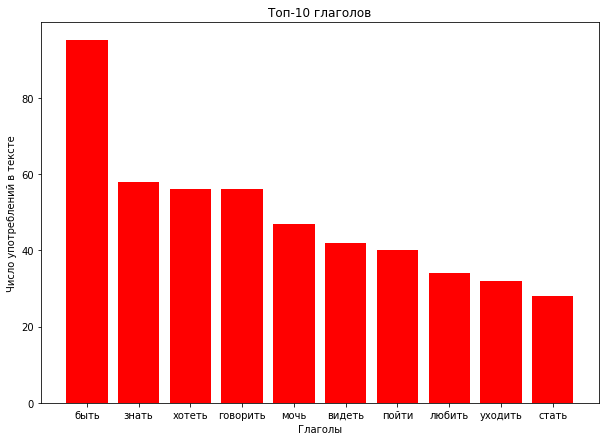

In [18]:
#строим графики
import matplotlib.pyplot as plt
from collections import Counter
verbs = {}
v = []
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    norm_form = w.normal_form
    if w.tag.POS == 'VERB':
         v.append(norm_form)
top10 = Counter(v).most_common(10)
verbs_2 = dict(top10)
X = verbs_2.keys()
Y = verbs_2.values()
plt.figure(figsize = (10,7))
plt.bar(X, Y, color='red')
plt.title('Топ-10 глаголов')
plt.xlabel('Глаголы')
plt.ylabel('Число употреблений в тексте')
plt.show()

No handles with labels found to put in legend.


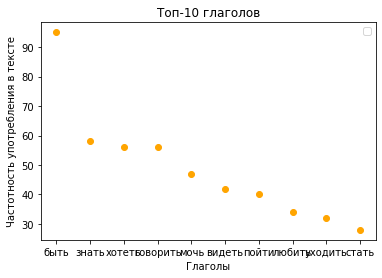

In [27]:
X = verbs_2.values()
Y = verbs_2.keys() 
plt.scatter(Y, X, color='orange', label='') 
plt.title('Топ-10 глаголов') 
plt.ylabel('Частотность употребления в тексте')
plt.xlabel('Глаголы')
plt.legend(loc='best') 
plt.show()

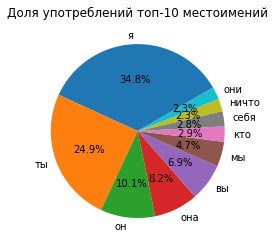

In [31]:
npros = []
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    if w.tag.POS == 'NPRO':
         npros.append(w.normal_form)
top10_npros = Counter(npros).most_common(10)
f_1 = []
f_2 = []
for tup in top10_npros:
    f_1.append(tup[0])
    f_2.append(tup[1])
plt.pie(f_2, labels=f_1, startangle=30, autopct='%1.1f%%');
plt.title('Доля употреблений топ-10 местоимений');

In [32]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])

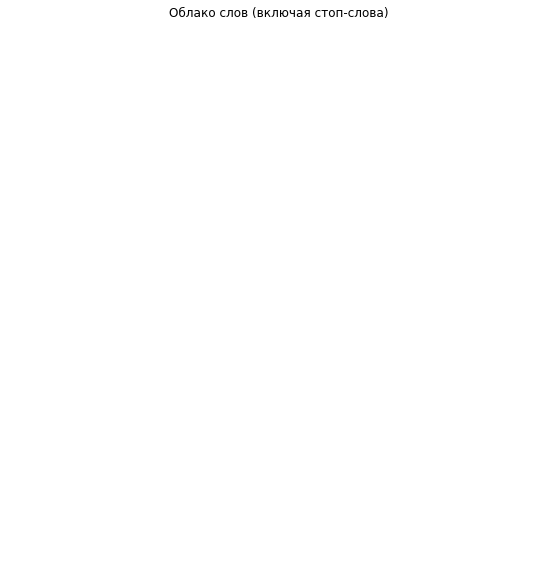

In [39]:
advb = []
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    if w.tag.POS == 'ADVB':
         advb.append(w.normal_form)
advb_str = ''.join(advb)
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(advb_str)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (включая стоп-слова)')
plt.show()